Iterative executions 

In [68]:
import random
A_arr = []
for i in range (10):
    if i <8:
        A_arr.append(i)
        random.shuffle(A_arr)
    else:
        A_arr.append(i)
print(A_arr)

start_l = 0
end_l = 10
length_l = 9
my_array_B = random.sample(range(start_l,end_l), length_l)
print(my_array_B)

''' case A: a for loop is used to generate numbers in range of 1 to 10 then the first 4/5 of the elements are shuffled randomly 
and the 1/5 elements are left sorted. This means that they will not be swapped since they are already sorted. 
therefore there will be less swaps compared to the second case where the whole list is generated randomly

'''
'''Case B is a rondomly generated list and after each execution it generates a new random list and will involve more swaps than case A.
the function random.sample() is used because it returns a completely random list.

'''


[3, 2, 0, 1, 5, 6, 4, 7, 8, 9]
[5, 9, 0, 4, 2, 7, 3, 6, 8]


'Case B is a rondomly generated list and after each execution it generates a new random list and will involve more swaps than case A.\nthe function random.sample() is used because it returns a completely random list.\n\n'

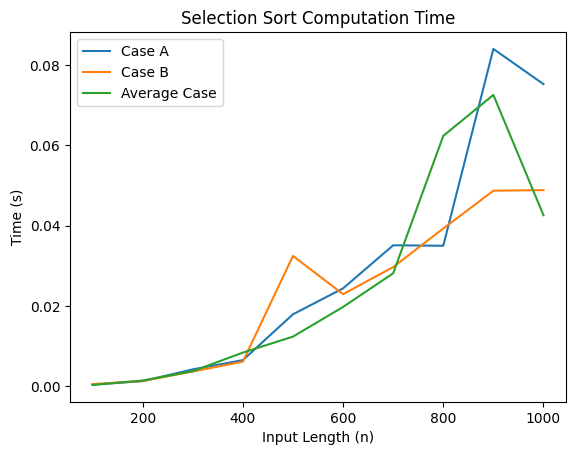

In [75]:
import random
import timeit
import matplotlib.pyplot as plt

def selection_sort(arr):
    n = len(arr)
    for i in range(n-1):
        min_idx = i
        for j in range(i+1, n):
            if arr[j] < arr[min_idx]:
                min_idx = j
        arr[i], arr[min_idx] = arr[min_idx], arr[i]

def generate_case_A(n):
    return list(range(n, 0, -1))

def generate_case_B(n):
    return list(range(1, n+1))

def generate_random_sequence(n):
    return random.sample(range(1, n+1), n)

def measure_time(sequence, repeats):
    time_taken = timeit.timeit(lambda: selection_sort(sequence), number=repeats)
    return time_taken / repeats

def plot_curves(start_n, end_n, step, repeats):
    lengths = list(range(start_n, end_n+1, step))
    case_A_times = []
    case_B_times = []
    random_times = []

    for n in lengths:
        case_A_sequence = generate_case_A(n)
        case_B_sequence = generate_case_B(n)
        random_sequence = generate_random_sequence(n)

        case_A_time = measure_time(case_A_sequence, repeats)
        case_B_time = measure_time(case_B_sequence, repeats)
        random_time = measure_time(random_sequence, repeats)

        case_A_times.append(case_A_time)
        case_B_times.append(case_B_time)
        random_times.append(random_time)

    plt.plot(lengths, case_A_times, label='Case A')
    plt.plot(lengths, case_B_times, label='Case B')
    plt.plot(lengths, random_times, label='Average Case')
    plt.xlabel('Input Length (n)')
    plt.ylabel('Time (s)')
    plt.title('Selection Sort Computation Time')
    plt.legend()
    plt.show()

# Parameters
start_n = 100
end_n = 1000
step = 100
repeats = 10  # Number of repetitions to compute average time

# Plotting
plot_curves(start_n, end_n, step, repeats)
